In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.util import img_as_float

Original Image size: (965, 800)
U matrix size: (965, 800)
S matrix (diagonal) size: (800,)
V matrix size: (800, 800)
Approximate Image size for r=5: (965, 800)
Approximate Image size for r=20: (965, 800)
Approximate Image size for r=100: (965, 800)


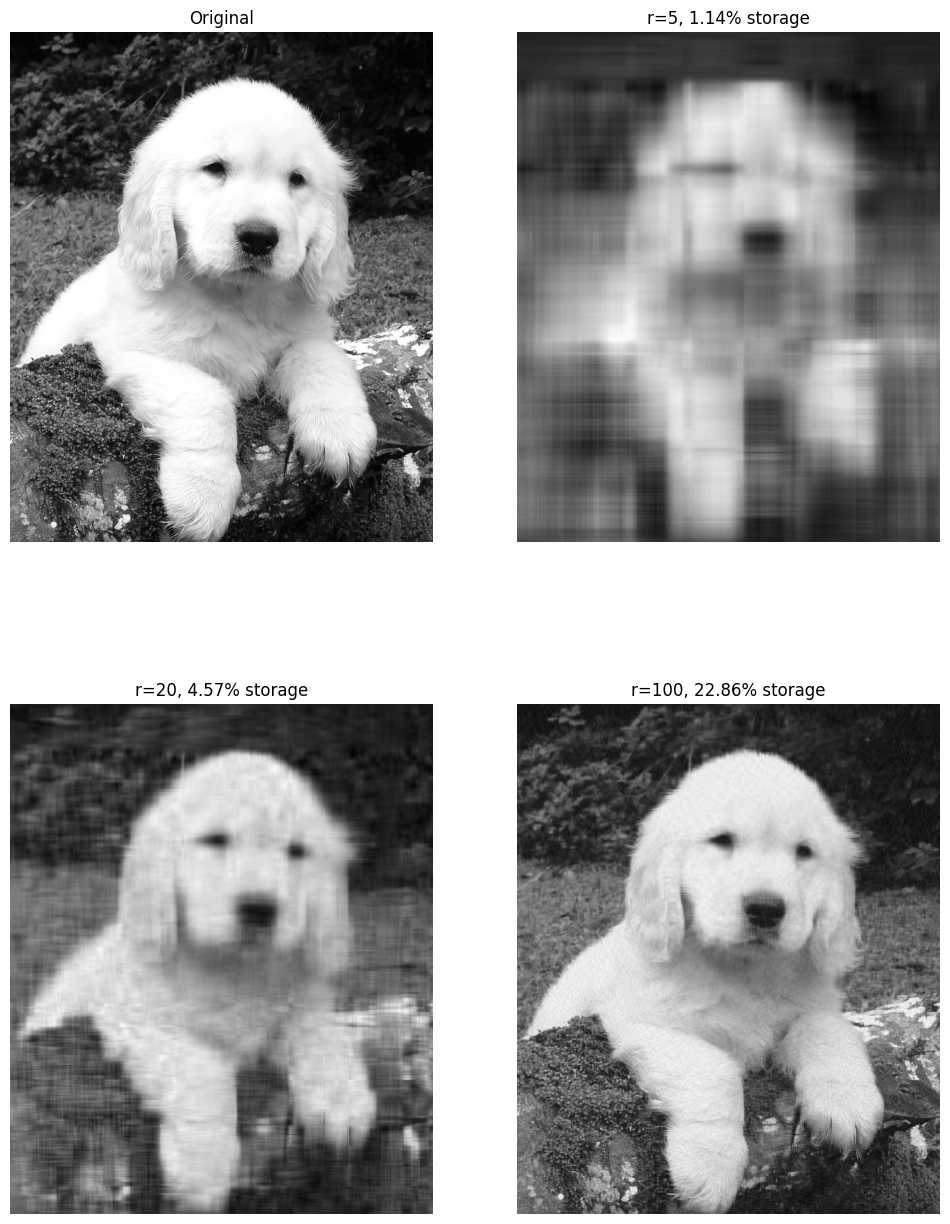

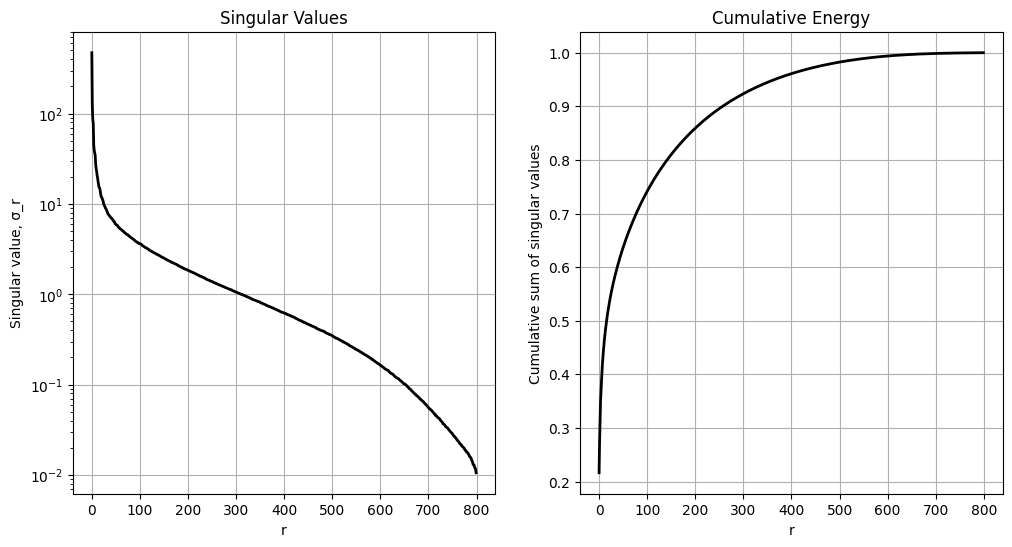

In [4]:
#Load and preprocess image
def load_and_preprocess_image(image_path):
    A = io.imread(image_path)
    X = img_as_float(color.rgb2gray(A))  # Convert to grayscale and float
    print(f"Original Image size: {X.shape}")
    return X

#Perform Singular Value Decomposition (SVD)
def perform_svd(X):
    U, S, V = np.linalg.svd(X, full_matrices=False)  # Perform SVD
    print(f"U matrix size: {U.shape}")
    print(f"S matrix (diagonal) size: {S.shape}")
    print(f"V matrix size: {V.shape}")
    return U, S, V

# Approximate image using top 'r' singular values
def approximate_image(U, S, V, r):
    Xapprox = np.dot(U[:, :r], np.dot(np.diag(S[:r]), V[:r, :]))  # Reconstruct image using rank 'r'
    print(f"Approximate Image size for r={r}: {Xapprox.shape}")
    return Xapprox

#Plot original and approximated images
def plot_images(X, U, S, V, ranks):
    plt.figure(figsize=(12, 16))

    # Plot original image
    plt.subplot(2, 2, 1)
    plt.imshow(X, cmap='gray')
    plt.axis('off')
    plt.title("Original")

    # Plot approximations for each rank in 'ranks'
    plotind = 2
    nx, ny = X.shape
    for r in ranks:
        Xapprox = approximate_image(U, S, V, r)
        plt.subplot(2, 2, plotind)
        plt.imshow(Xapprox, cmap='gray')
        plt.axis('off')
        storage_percent = 100 * r * (nx + ny) / (nx * ny)
        plt.title(f"r={r}, {storage_percent:.2f}% storage")
        plotind += 1

    plt.show()

# Plot singular values and cumulative energy
def plot_singular_values(S):
    plt.figure(figsize=(12, 6))

    # Singular values plot
    plt.subplot(1, 2, 1)
    plt.semilogy(S, 'k', linewidth=2)
    plt.grid(True)
    plt.xlabel('r')
    plt.ylabel('Singular value, σ_r')
    plt.title('Singular Values')

    # Cumulative energy plot
    plt.subplot(1, 2, 2)
    plt.plot(np.cumsum(S) / np.sum(S), 'k', linewidth=2)
    plt.grid(True)
    plt.xlabel('r')
    plt.ylabel('Cumulative sum of singular values')
    plt.title('Cumulative Energy')

    plt.show()


def main():
    image_path = 'https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg'

    ranks = [5, 20, 100]  # Truncation values

    X = load_and_preprocess_image(image_path)
    U, S, V = perform_svd(X)
    plot_images(X, U, S, V, ranks)
    plot_singular_values(S)

main()



* For r = 5: Approximation using only the top 5 singular values. Image quality is low but storage is reduced significantly.

* For r = 20: Better quality with more details retained but higher storage.

* For r = 100: Close to the original image with most details preserved.

Singular values represent the importance or contribution of each component to the image. Larger values contribute more to the image, while smaller ones contribute less.

we can see from the graph that the singular values drop off sharply after a certain point, meaning that a lot of the singular values are relatively small and contribute little to the overall image. This is the basis for compression — we can ignore many of the smaller singular values and still retain most of the image's information.